In [2]:
import pandas as pd
data=pd.read_csv("../Inputs/data/raw_data/BrentOilPrices.csv")

In [3]:
data.head(100)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
95,01-Oct-87,18.50
96,02-Oct-87,18.65
97,05-Oct-87,18.78
98,06-Oct-87,18.60


/tmp/ipykernel_83172/3916554486.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])


Correlation with Brent Oil Prices:
GDP: 0.6745
Inflation: 0.7483
Unemployment: 0.1776
Exchange Rate: 0.6800
Global Economic Policy Uncertainty: 0.2340
Equity Market Volatility: -0.0577
OPEC Policies: -0.6625


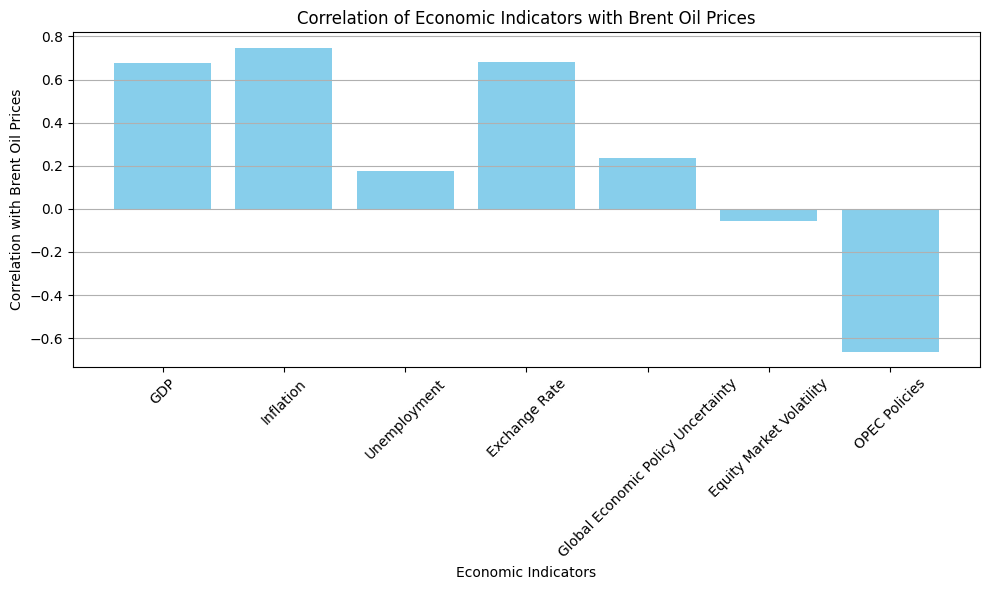

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load raw data for each economic indicator
brent_oil_prices = pd.read_csv('../Inputs/data/raw_data/BrentOilPrices.csv', parse_dates=['Date'])
brent_oil_prices.set_index('Date', inplace=True)

gdp = pd.read_csv('../Inputs/data/raw_data/gdp.csv', parse_dates=['DATE'])
gdp.set_index('DATE', inplace=True)

inflation = pd.read_csv('../Inputs/data/raw_data/inflation.csv', parse_dates=['DATE'])
inflation.set_index('DATE', inplace=True)

unemployment = pd.read_csv('../Inputs/data/raw_data/unemployment.csv', parse_dates=['DATE'])
unemployment.set_index('DATE', inplace=True)

exchange_rate = pd.read_csv('../Inputs/data/raw_data/exchange_rate.csv', parse_dates=['DATE'])
exchange_rate.set_index('DATE', inplace=True)

gepu_data = pd.read_csv('../Inputs/data/raw_data/global_economic_policy_uncertainty.csv', parse_dates=['DATE'])
gepu_data.set_index('DATE', inplace=True)

emv_data = pd.read_csv('../Inputs/data/raw_data/equity_market_volatility.csv', parse_dates=['DATE'])
emv_data.set_index('DATE', inplace=True)

opec_data = pd.read_csv('../Inputs/data/raw_data/opec_policies.csv', parse_dates=['DATE'])
opec_data.set_index('DATE', inplace=True)

# Calculate correlations with Brent Oil Prices
correlations = {
    'GDP': brent_oil_prices['Price'].corr(gdp['GDP']),
    'Inflation': brent_oil_prices['Price'].corr(inflation['CPIAUCSL']),
    'Unemployment': brent_oil_prices['Price'].corr(unemployment['UNRATE']),
    'Exchange Rate': brent_oil_prices['Price'].corr(exchange_rate['DEXUSEU']),
    'Global Economic Policy Uncertainty': brent_oil_prices['Price'].corr(gepu_data['GEPUCURRENT']),
    'Equity Market Volatility': brent_oil_prices['Price'].corr(emv_data['EMVELECTGOVRN']),
    'OPEC Policies': brent_oil_prices['Price'].corr(opec_data['COOTHERZ315'])
}

# Print individual correlations
print("Correlation with Brent Oil Prices:")
for indicator, correlation in correlations.items():
    print(f"{indicator}: {correlation:.4f}")

# Plot each correlation individually
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')
plt.xlabel('Economic Indicators')
plt.ylabel('Correlation with Brent Oil Prices')
plt.title('Correlation of Economic Indicators with Brent Oil Prices')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


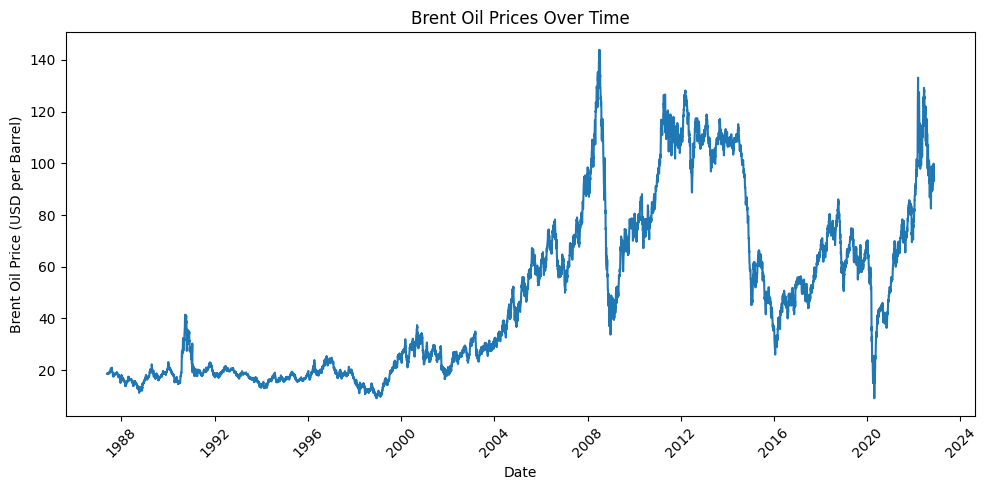

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed Brent oil prices data
file_path = '../Inputs/data/processed_data/preprocessed_brent_prices_data.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display basic information about the data
print(data.info())

# Display the first few rows of the data
print(data.head())

# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Brent Oil Price (USD per Barrel)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
